## Labelling Raw dataset

### Reading dataset and splitting it 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file_name='ritu-1722686164.8227277.csv'
df=pd.read_csv(f'RawDataset/{file_name}')
total_rows=len(df)
df_train=df.iloc[total_rows-12000*5:total_rows] #2 sec gap data
df_test=df.iloc[total_rows-12000*5-24000*5:total_rows-12000*5] # 4 sec gap data


In [4]:
df_test.head()

,1388.6854282790293,1397.9351091956305,1327.0208888350228,461.8674004356097,1415.8178256343922,0.0
8679,19.549007,1.497502,-4.755584,4.222259,27.021235,0.0
8680,-4.147908,-1.768045,1.486030,3.825342,-8.460800,0.0
8681,-3.761707,-2.822161,2.724695,4.286667,-11.870363,0.0
8682,11.692634,0.795481,0.007181,3.744306,4.652206,0.0
8683,4.957697,0.682408,4.326487,2.840591,4.268179,0.0


### Filtering our dataset by applying envelope

In [5]:
from EMGFilter import EMG_filter
for channel in range(0,6):
  filtered_values =[]
  emg_filter=EMG_filter(sample_frequency=1000,range_=0.05,reference_available=False)
  for i in df_train.iloc[:,channel]:
    filtered=emg_filter.filter(i,0)
    filtered_values.append(filtered)
  df_train[f'filteredc{channel}']=filtered_values


for channel in range(0,6):
  filtered_values =[]
  emg_filter=EMG_filter(sample_frequency=1000,range_=0.05,reference_available=False)
  for i in df_test.iloc[:,channel]:
    filtered=emg_filter.filter(i,0)
    filtered_values.append(filtered)
  df_test[f'filteredc{channel}']=filtered_values

C:\Users\Dev\AppData\Local\Temp\ipykernel_12964\658154332.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[f'filteredc{channel}']=filtered_values
C:\Users\Dev\AppData\Local\Temp\ipykernel_12964\658154332.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[f'filteredc{channel}']=filtered_values
C:\Users\Dev\AppData\Local\Temp\ipykernel_12964\658154332.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

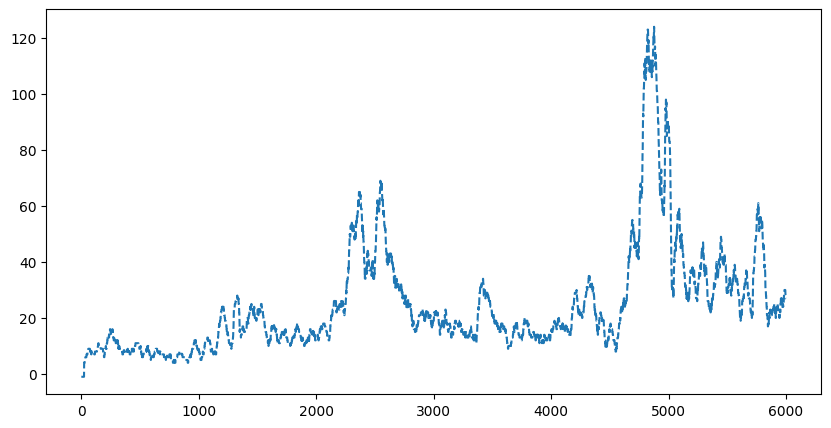

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(0,6000), df_train['filteredc4'].iloc[0:6000], label='Filtered EMG Data', linestyle='--')

### Identifying peaks and taking windows and marking dataset

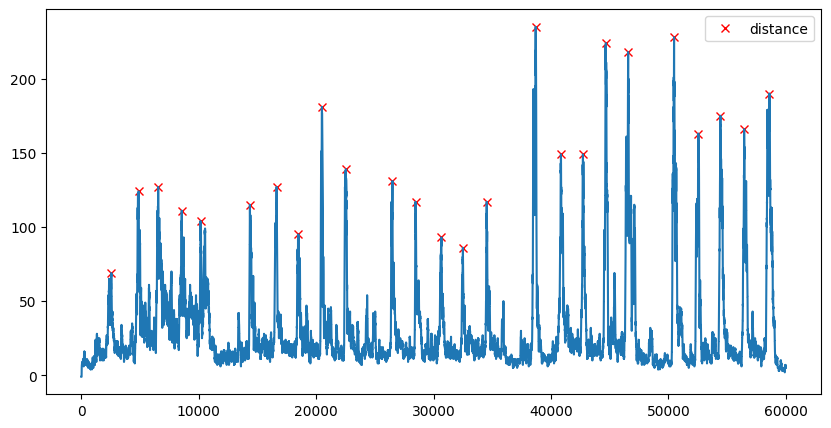

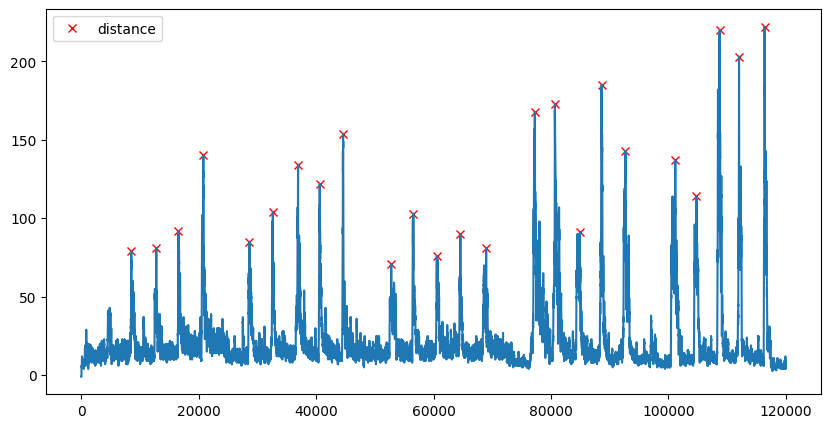

In [7]:
from scipy.signal import find_peaks
x=df_train['filteredc4'].iloc[0:60000]
peaks1, _ = find_peaks(x, prominence=60,distance=700)
plt.figure(figsize=(10, 5))
plt.plot(peaks1, x.iloc[peaks1], "xr"); plt.plot(range(0,60000),x); plt.legend(['distance'])

x=df_test['filteredc4'].iloc[0:120000]
peaks2, _ = find_peaks(x, prominence=60,distance=900)
plt.figure(figsize=(10, 5))
plt.plot(peaks2, x.iloc[peaks2], "xr"); plt.plot(range(0,120000),x); plt.legend(['distance'])

In [8]:
print(len(peaks1),len(peaks2))

25 24


In [9]:
label_train = ['rest' for i in range(60000)]
window = 250
for index,i in enumerate(peaks1):
    if index <len(peaks1)-1:
      center_pos=int((peaks1[index+1]+peaks1[index])/2)
      label_train[center_pos-50:center_pos+50]=['baseline' for _ in range(100)]
    if i <= 12000:
        label_train[i-window:i+window] = ['thumb' for _ in range(2*window)]
    elif i <= 24000:
        label_train[i-window:i+window] = ['index' for _ in range(2*window)]
    elif i <= 36000:
        label_train[i-window:i+window] = ['middle' for _ in range(2*window)]
    elif i <= 48000:
        label_train[i-window:i+window] = ['ring' for _ in range(2*window)]
    elif i <= 60000:
        label_train[i-window:i+window] = ['pinky' for _ in range(2*window)]
df_train['label'] = label_train

label_test = ['rest' for i in range(120000)]
window = 250
for index,i in enumerate(peaks2):
    if index <len(peaks2)-1:
      center_pos=int((peaks2[index+1]+peaks2[index])/2)
      label_test[center_pos-50:center_pos+50]=['baseline' for _ in range(100)]
    if i <= 26000:
        label_test[i-window:i+window] = ['thumb' for _ in range(2*window)]
    elif i <= 48000:
        label_test[i-window:i+window] = ['index' for _ in range(2*window)]
    elif i <= 72000:
        label_test[i-window:i+window] = ['middle' for _ in range(2*window)]
    elif i <= 96000:
        label_test[i-window:i+window] = ['ring' for _ in range(2*window)]
    elif i <= 120000:
        label_test[i-window:i+window] = ['pinky' for _ in range(2*window)]
df_test['label'] = label_test


C:\Users\Dev\AppData\Local\Temp\ipykernel_12964\1080189852.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['label'] = label_train
C:\Users\Dev\AppData\Local\Temp\ipykernel_12964\1080189852.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['label'] = label_test


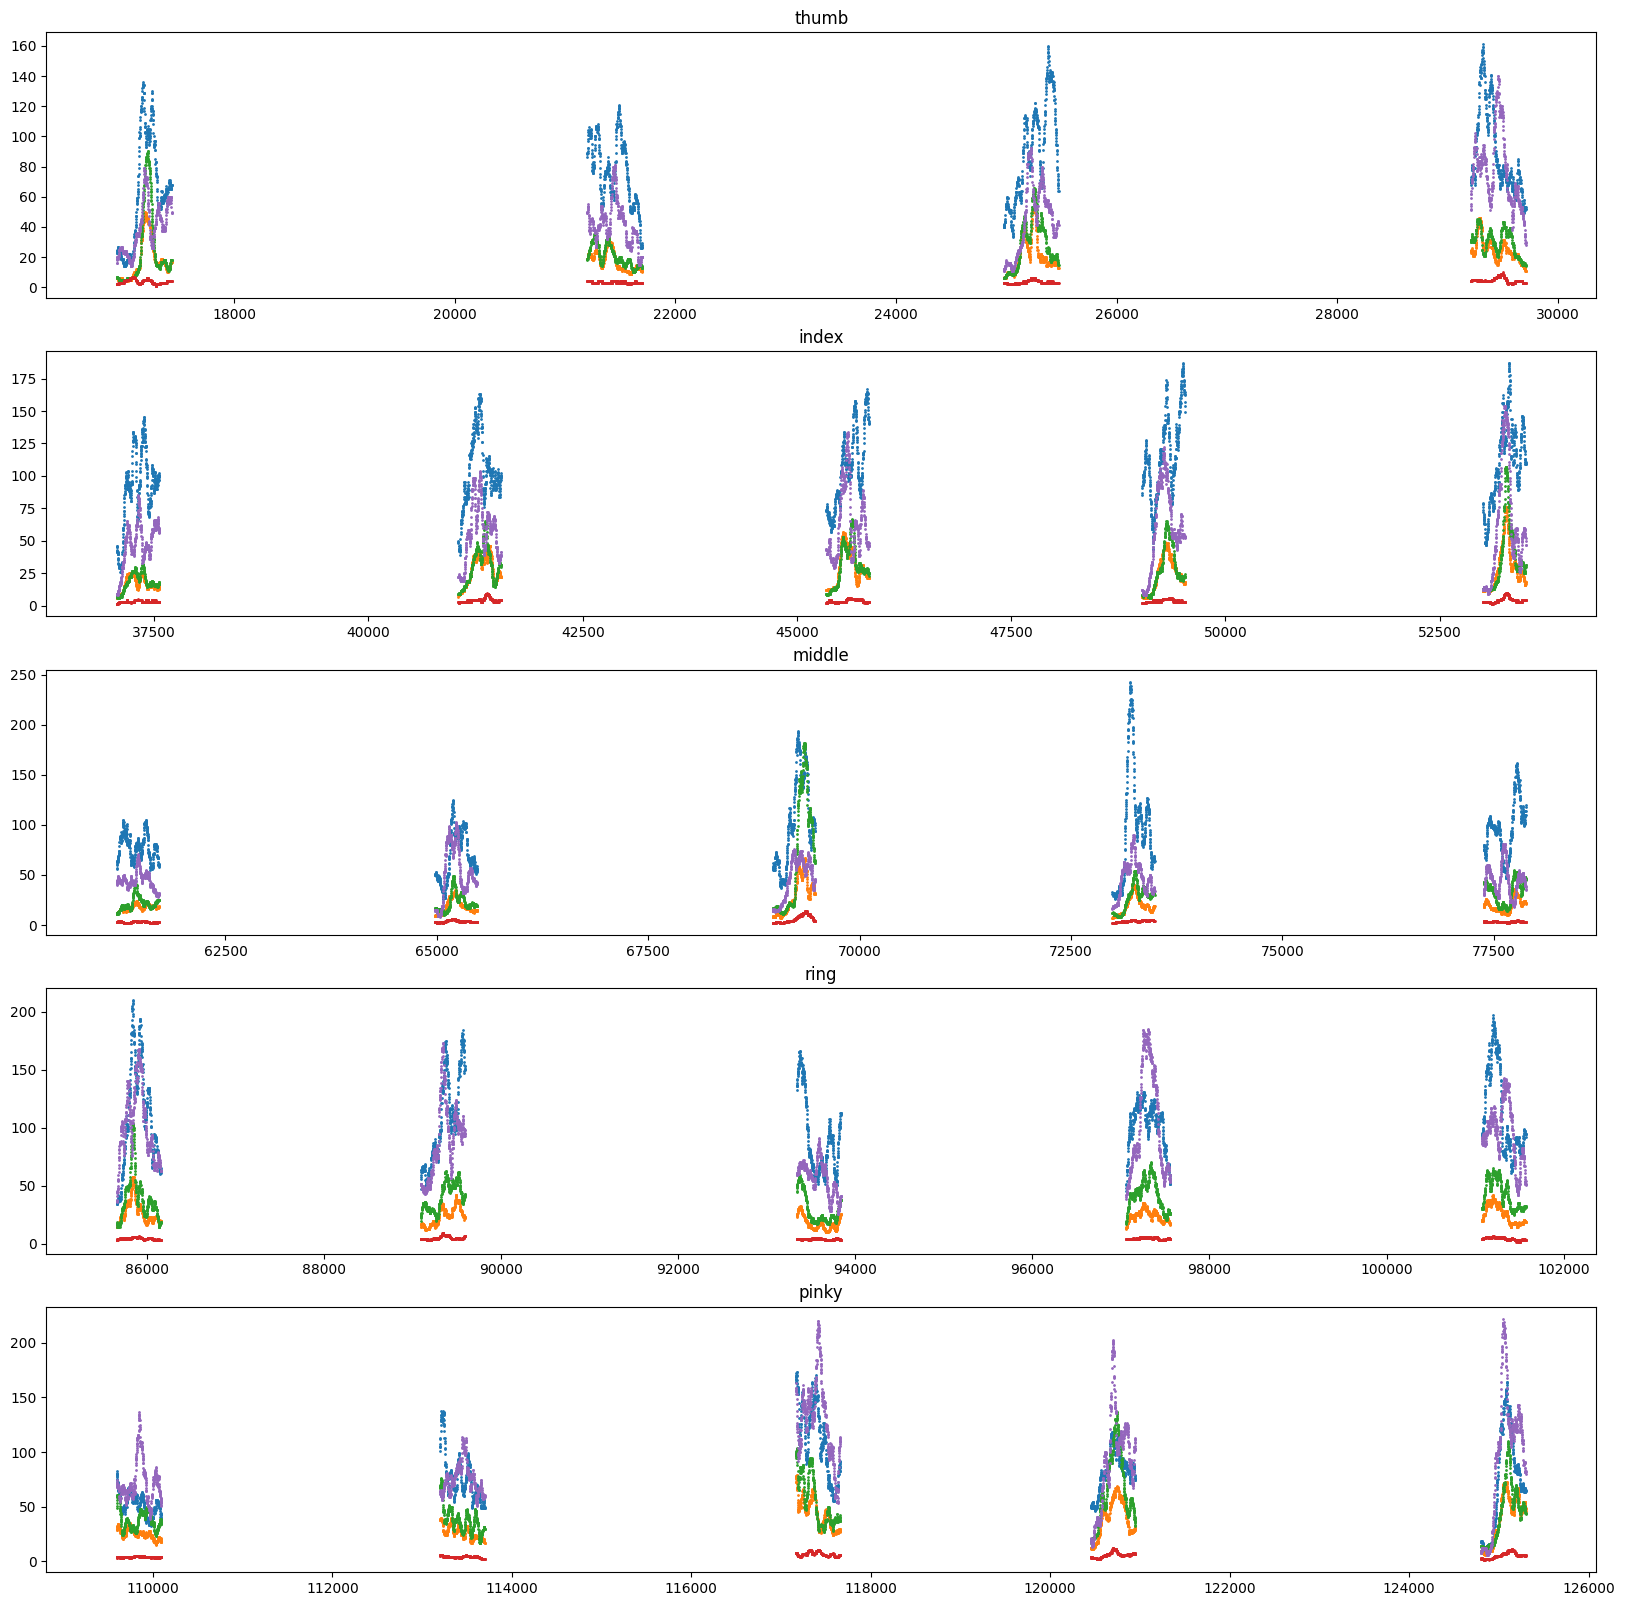

In [10]:
N_SIGNS = 5
N_ELECTRODES = 5
fig, ax = plt.subplots(N_SIGNS, figsize=(20, 20))
label_list = ["thumb", "index", "middle", "ring", "pinky"]
channel_labels = [f'Channel {i+1}' for i in range(N_ELECTRODES)]
for i, label_i in enumerate(label_list):
    sign_df = df_test[df_test.label == label_i].iloc[:120000]
    for electrode in range(N_ELECTRODES):
        ax[i].scatter(sign_df.index, sign_df.iloc[:, 6 + electrode], s=1,label=channel_labels[electrode])  # Use scatter for points, s=1 sets point size
        ax[i].title.set_text(label_i)

plt.show()

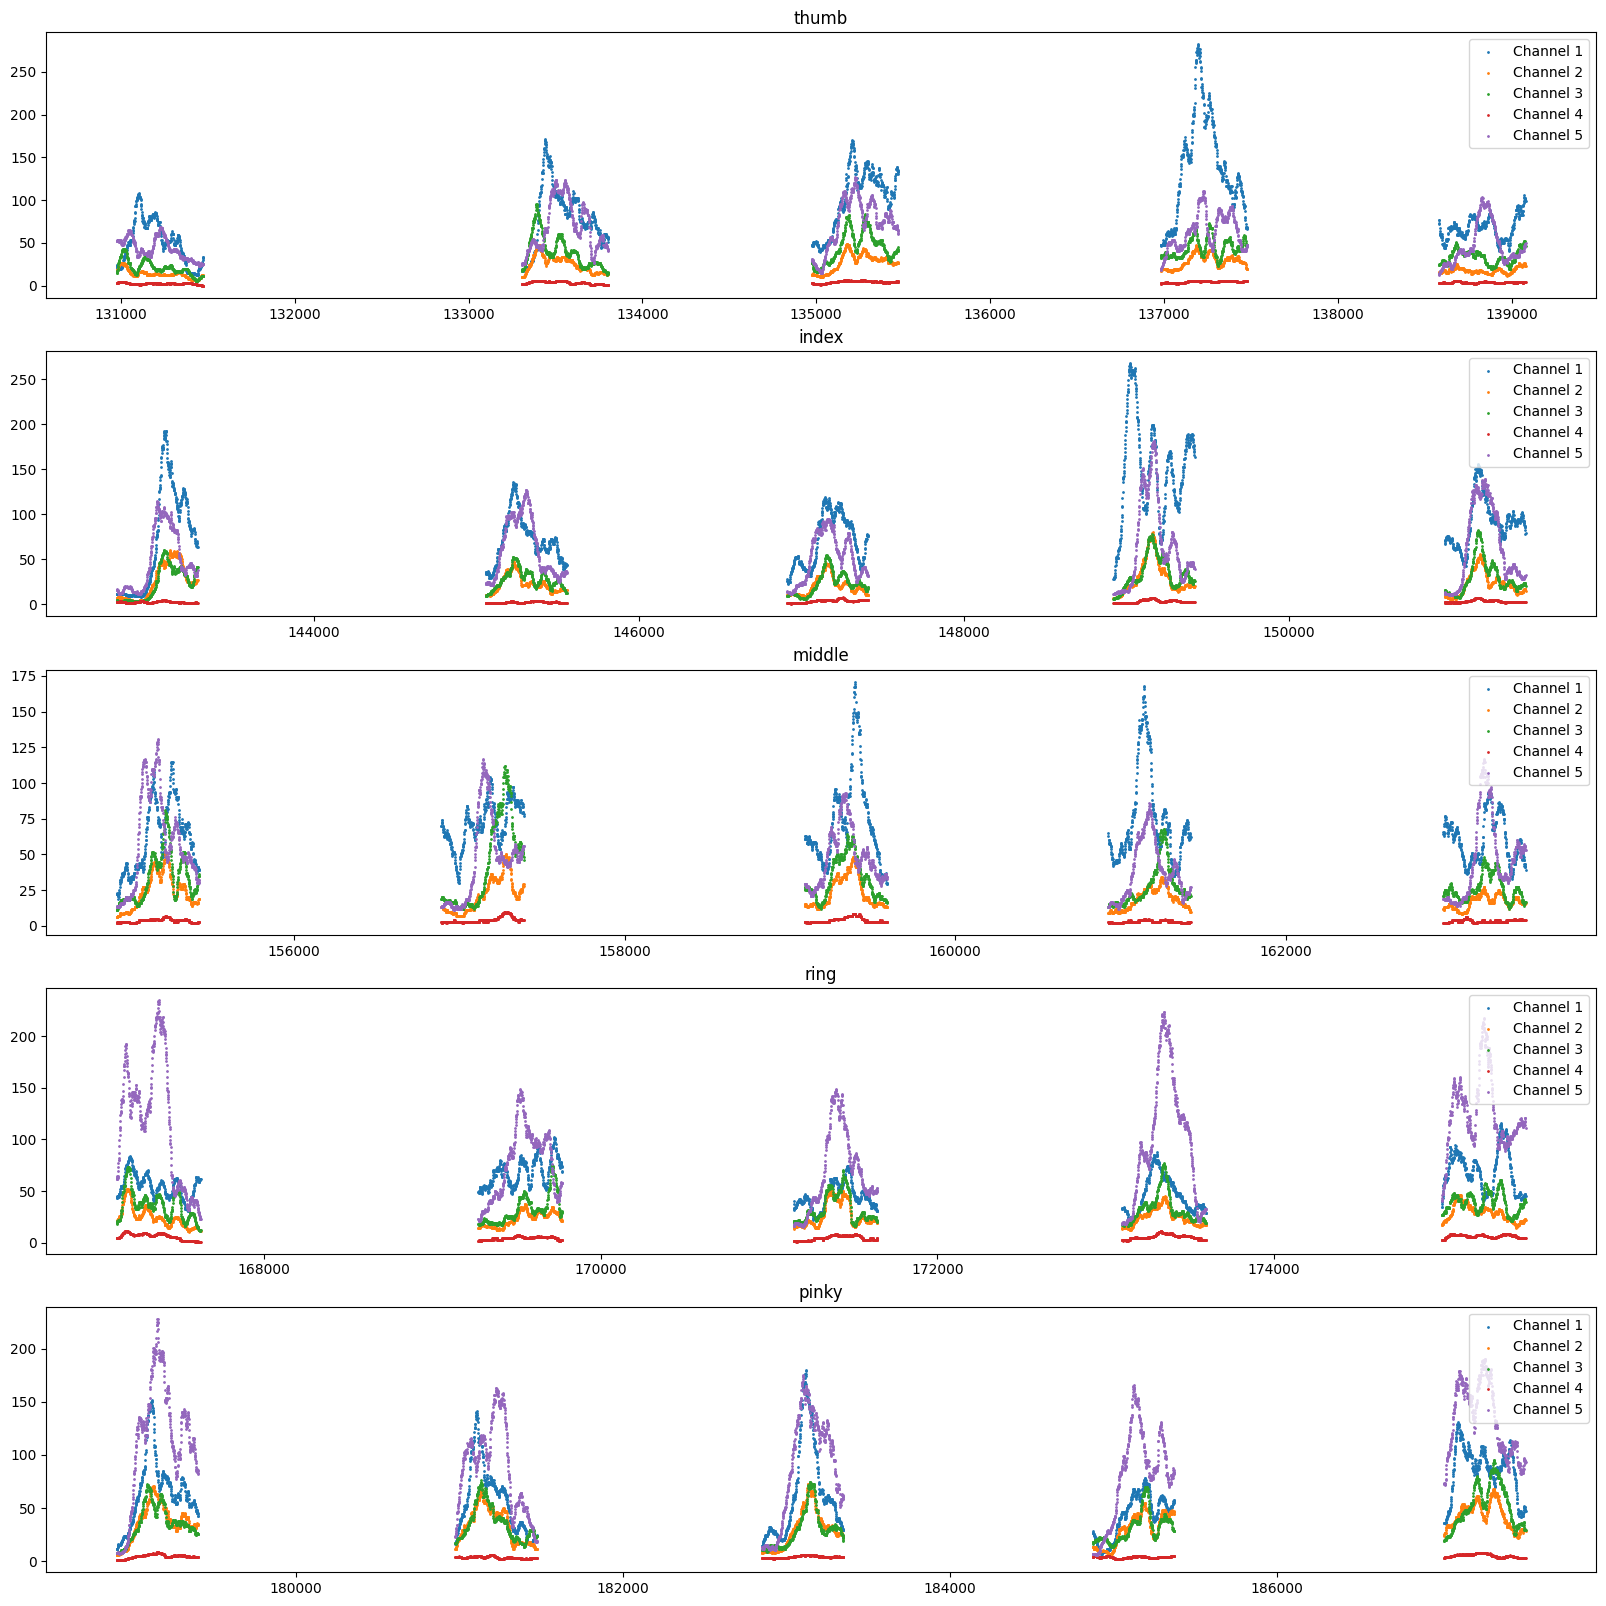

In [11]:
N_SIGNS = 5
N_ELECTRODES = 5
fig, ax = plt.subplots(N_SIGNS, figsize=(20, 20))
label_list = ["thumb", "index", "middle", "ring", "pinky"]
channel_labels = [f'Channel {i+1}' for i in range(N_ELECTRODES)]
for i, label_i in enumerate(label_list):
    sign_df = df_train[df_train.label == label_i].iloc[:60000]
    for electrode in range(N_ELECTRODES):
        ax[i].scatter(sign_df.index, sign_df.iloc[:, 6 + electrode], s=1,label=channel_labels[electrode])  # Use scatter for points, s=1 sets point size
        ax[i].title.set_text(label_i)
    ax[i].legend(loc='upper right')
plt.show()

In [12]:
df_train.to_csv(f'FilteredDataset/2SecondsIntervalDataset/{file_name}')
df_test.to_csv(f'FilteredDataset/4SecondsIntervalDataset/{file_name}')

### Calculating features for dataset for a window of 250 with peak as center

In [13]:
import numpy as np
def calculate_features(window_data):
    # Zero crossings
    # Mean absolute value
    mav = np.mean(np.abs(window_data))

    # Waveform length
    wl = np.sum(np.abs(np.diff(window_data)))

    # Root mean square
    rms = np.sqrt(np.mean(window_data**2))

    # Variance
    var = np.var(window_data)

    return mav, wl, rms, var

In [14]:
window = 125
features = []

# Iterate over the peaks
for index, i in enumerate(peaks1):
    features_row = []
    for channel in range(5):
        window_data = df_train[f'filteredc{channel}'].iloc[i-window:i+window]
        mav, wl, rms, var = calculate_features(window_data)
        features_row.extend([mav, wl, rms, var])

    if i <= 12000:
        features_row.append('thumb')
    elif i <= 24000:
        features_row.append('index')
    elif i <= 36000:
        features_row.append('middle')
    elif i <= 48000:
        features_row.append('ring')
    elif i <= 60000:
        features_row.append('pinky')

    features.append(features_row)

# Create a DataFrame from the features list
columns = [f'ch{ch}_{stat}' for ch in range(5) for stat in ['mav', 'wl', 'rms', 'var']]
columns.append('label')
df_train_features = pd.DataFrame(features, columns=columns)

for index,i in enumerate(peaks1):
    if index<len(peaks1)-1:
        features_row = []
        for channel in range (0,5):
                center_pos = int((peaks1[index+1] + peaks1[index]) / 2)
                window_data = df_train[f'filteredc{channel}'].iloc[center_pos-50:center_pos+50]
                mav, wl, rms, var = calculate_features(window_data)
                features_row.extend([mav, wl, rms, var])
        features_row.append('baseline')
        df_train_features.loc[len(df_train_features)] = features_row

In [15]:
df_train_features

,ch0_mav,ch0_wl,ch0_rms,ch0_var,ch1_mav,ch1_wl,ch1_rms,ch1_var,ch2_mav,ch2_wl,...,ch2_var,ch3_mav,ch3_wl,ch3_rms,ch3_var,ch4_mav,ch4_wl,ch4_rms,ch4_var,label
0,66.380,287,68.429263,276.259600,14.056,56,14.128553,2.044864,22.124,94,...,27.268624,2.400,18,2.460894,0.296000,46.004,188,47.180123,109.595984,thumb
1,104.736,479,108.065351,708.490304,27.968,120,28.417741,25.358976,38.928,183,...,123.122816,3.964,17,4.133280,1.370704,92.288,352,94.664756,444.341056,thumb
2,120.480,551,123.126082,644.601600,34.152,153,35.001486,58.744896,57.900,255,...,211.082000,5.504,34,5.581398,0.857984,92.896,406,94.702777,338.949184,thumb
3,186.016,759,191.066522,1904.463744,32.884,140,33.593035,47.134544,47.412,238,...,157.882256,4.760,13,4.822448,0.598400,72.804,348,75.144474,346.269584,thumb
4,67.756,281,68.684933,126.744464,16.828,76,16.940956,3.814416,32.444,118,...,41.110864,3.408,13,3.467564,0.409536,62.920,248,67.313713,572.209600,thumb
5,85.032,408,106.879296,4192.742976,30.808,134,36.685038,396.659136,26.940,131,...,397.248400,3.352,12,3.452535,0.684096,68.612,296,77.225048,1256.101456,index
6,87.696,357,90.627325,522.723584,28.332,135,29.645168,76.133776,35.044,159,...,78.890064,3.172,10,3.250231,0.502416,86.256,297,90.436320,738.630464,index
7,87.100,372,91.208223,732.530000,27.592,120,29.130877,87.289536,30.500,139,...,153.954000,4.832,25,4.962258,1.275776,71.860,325,73.614971,255.304400,index
8,148.556,670,155.739334,2185.854864,43.244,193,46.815168,321.616464,45.812,216,...,289.864656,4.528,26,4.769906,2.249216,102.604,551,111.395350,1881.343184,index
9,103.096,464,106.961451,811.966784,32.652,156,34.244007,106.498896,41.912,216,...,341.704256,4.712,28,4.863743,1.453056,102.452,436,106.323638,808.303696,index


In [16]:
df_train_features.to_csv(f'FeaturesDataset/2SecondsIntervalDataset/{file_name}')

In [17]:
window = 125
features = []

# Iterate over the peaks
for index, i in enumerate(peaks2):
    features_row = []
    for channel in range(5):
        window_data = df_test[f'filteredc{channel}'].iloc[i-window:i+window]
        mav, wl, rms, var = calculate_features(window_data)
        features_row.extend([mav, wl, rms, var])

    if i <= 26000:
        features_row.append('thumb')
    elif i <= 48000:
        features_row.append('index')
    elif i <= 72000:
        features_row.append('middle')
    elif i <= 96000:
        features_row.append('ring')
    elif i <= 120000:
        features_row.append('pinky')

    features.append(features_row)

# Create a DataFrame from the features list
columns = [f'ch{ch}_{stat}' for ch in range(5) for stat in ['mav', 'wl', 'rms', 'var']]
columns.append('label')
df_test_features = pd.DataFrame(features, columns=columns)

for index,i in enumerate(peaks2):
    if index < len(peaks2) - 1:
        features_row = []
        for channel in range (0,5):
            center_pos = int((peaks2[index+1] + peaks2[index]) / 2)
            window_data = df_test[f'filteredc{channel}'].iloc[center_pos-50:center_pos+50]
            mav, wl, rms, var = calculate_features(window_data)
            features_row.extend([mav, wl, rms, var])
        features_row.append('baseline')
        df_test_features.loc[len(df_test_features)] = features_row



In [18]:
df_test_features

,ch0_mav,ch0_wl,ch0_rms,ch0_var,ch1_mav,ch1_wl,ch1_rms,ch1_var,ch2_mav,ch2_wl,...,ch2_var,ch3_mav,ch3_wl,ch3_rms,ch3_var,ch4_mav,ch4_wl,ch4_rms,ch4_var,label
0,83.872,395,91.142262,1272.399616,24.856,103,28.856057,214.851264,35.968,178,...,842.350976,4.160,22,4.456007,2.550400,41.472,209,44.797053,286.849216,thumb
1,81.092,355,83.103381,330.259536,18.292,70,19.648817,51.478736,21.084,83,...,32.932944,3.364,27,3.402940,0.263504,49.292,252,51.142898,185.894736,thumb
2,90.796,423,92.708295,350.914384,29.520,166,31.607594,127.609600,40.508,197,...,150.689936,4.044,17,4.212838,1.394064,57.168,261,60.904253,441.147776,thumb
3,92.520,383,95.593807,578.225600,24.332,102,24.727555,19.405776,32.420,127,...,35.355600,5.340,26,5.682605,3.776400,86.816,365,90.861477,718.790144,thumb
4,106.608,482,108.815881,475.630336,20.184,83,20.603107,17.094144,23.184,98,...,20.934144,3.444,15,3.483102,0.270864,52.300,219,53.808512,160.066000,index
5,122.836,533,124.861924,501.817104,35.620,157,36.161692,38.883600,41.068,182,...,127.927376,5.048,25,5.408142,3.765696,70.992,345,73.203606,318.903936,index
6,113.384,517,115.309219,440.284544,38.268,169,40.292282,159.028176,41.452,192,...,187.487696,4.092,14,4.270363,1.491536,76.848,373,82.201752,851.512896,index
7,109.848,496,113.653016,850.424896,33.272,140,34.836418,106.550016,38.892,149,...,260.304336,4.424,24,4.498000,0.660224,83.668,385,86.231989,435.621776,index
8,128.212,572,130.619646,623.175056,41.304,183,44.690223,291.195584,51.204,227,...,794.330384,5.332,24,5.774773,4.917776,90.948,430,99.510100,1630.721296,index
9,79.704,373,80.548470,135.328384,18.808,77,18.984204,6.659136,25.316,121,...,48.760144,3.232,11,3.310589,0.514176,48.900,190,49.566481,65.626000,middle


In [19]:
df_test_features.to_csv(f'FeaturesDataset/4SecondsIntervalDataset/{file_name}')

In [20]:
df_features= pd.concat([df_train_features,df_test_features],ignore_index=True)
df_features.to_csv(f'FeaturesDataset/CombinedDataset/{file_name}')